## Анализ результатов АБ-теста


В данном задании вам нужно будет
* проанализировать АБ тест, проведенный на реальных пользователях Яндекса
* подтвердить или опровергнуть наличие изменений в пользовательском поведении между контрольной (control) и тестовой (exp) группами
* определить характер этих изменений и практическую значимость вводимого изменения
понять, какая из пользовательских групп более всего проигрывает / выигрывает от тестируемого изменения (локализовать изменение)

Описание данных:
* userID: уникальный идентификатор пользователя
* browser: браузер, который использовал userID
* slot: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)
* n_clicks: количество кликов, которые пользоваль совершил за n_queries
* n_queries: количество запросов, который совершил userID, пользуясь браузером browser
* n_nonclk_queries: количество запросов пользователя, в которых им не было совершено ни одного клика

Обращаем ваше внимание, что не все люди используют только один браузер, поэтому в столбце userID есть повторяющиеся идентификаторы. В предлагаемых данных уникальным является сочетание userID и browser.

Основная метрика, на которой мы сосредоточимся в этой работе, — это количество пользовательских кликов на web-странице в зависимости от тестируемого изменения этой страницы.

Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите до третьего знака после точки.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('ab_browser_test.csv')
print("data shape: ", data.shape)
data.head()

data shape:  (566134, 6)


,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
sum_n_clicks_control = sum(data[data.slot == 'control'].n_clicks)
sum_n_clicks_exp = sum(data[data.slot == 'exp'].n_clicks)
print(sum_n_clicks_control, sum_n_clicks_exp)

3210027 3261823


In [4]:
ans = sum_n_clicks_exp*100/sum_n_clicks_control
np.round(ans - 100, 3)

1.614

Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов.

Для этого постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп. Отметьте все верные утверждения.

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [6]:
np.random.seed(0)

n_clicks_control = data[data.slot == 'control'].n_clicks.values
n_clicks_exp = data[data.slot == 'exp'].n_clicks.values


control_median_scores = list(map(np.median, get_bootstrap_samples(n_clicks_control, 1000)))
exp_median_scores = list(map(np.median, get_bootstrap_samples(n_clicks_exp, 1000)))

print("95% confidence interval for the control n_clicks:",  stat_intervals(control_median_scores, 0.05))
print("95% confidence interval for the exp n_clicks:",  stat_intervals(exp_median_scores, 0.05))
print("difference between medians:", np.median(n_clicks_control) - np.median(n_clicks_exp))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(control_median_scores, exp_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the control n_clicks: [4. 4.]
95% confidence interval for the exp n_clicks: [5. 5.]
difference between medians: -1.0
95% confidence interval for the difference between medians [-1. -1.]


In [7]:
n_clicks_control = data[data.slot == 'control'].n_clicks.values
n_clicks_exp = data[data.slot == 'exp'].n_clicks.values


control_mean_scores = list(map(np.mean, get_bootstrap_samples(n_clicks_control, 1000)))
exp_mean_scores = list(map(np.mean, get_bootstrap_samples(n_clicks_exp, 1000)))

print("95% confidence interval for the control n_clicks:",  stat_intervals(control_mean_scores, 0.05))
print("95% confidence interval for the exp n_clicks:",  stat_intervals(exp_mean_scores, 0.05))
print("difference between means:", np.mean(n_clicks_control) - np.mean(n_clicks_exp))

delta_mean_scores = list(map(lambda x: x[0] - x[1], zip(control_mean_scores, exp_mean_scores)))
print("95% confidence interval for the difference between means",  stat_intervals(delta_mean_scores, 0.05))

95% confidence interval for the control n_clicks: [11.20679809 11.35869615]
95% confidence interval for the exp n_clicks: [11.50965481 11.65920804]
difference between means: -0.3030947340656329
95% confidence interval for the difference between means [-0.40880383 -0.1980987 ]


In [8]:
n_clicks  = np.hstack((n_clicks_control, n_clicks_exp))
n_clicks

array([12,  4, 22, ...,  4,  4,  3])

In [9]:
mean_scores = list(map(np.mean, get_bootstrap_samples(n_clicks, 1000)))
print("95% confidence interval for the united n_clicks:",  stat_intervals(mean_scores, 0.05)) ##bullshit?

95% confidence interval for the united n_clicks: [11.37937993 11.48187611]


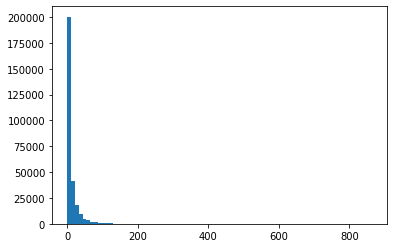

In [12]:
import matplotlib.pyplot as plt
plt.hist(n_clicks_control, bins = 80)
plt.show()

((array([494.42976641, 494.61921974, 494.72195324, ..., 503.27804676,
         503.38078026, 503.57023359]),
  array([  0,   0,   0, ..., 627, 773, 863])),
 (14.864475170767367, -7406.092203952593, 0.7328783997528364))

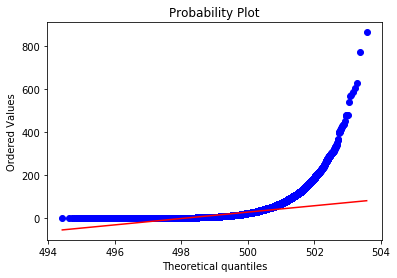

In [13]:
from scipy import stats
n_boot_samples = 500
stats.probplot(n_clicks_control, dist="norm", sparams=(n_boot_samples-1), plot=plt)


<img src = "image1.png">
    
Простое доказательство необходимости и достаточности этого требования можно посмотреть в самом последнем абзаце этого вопроса. Усвоение этого доказательства не обязательно для выполнения задания.

Оба этих предположения можно проверить с помощью бутстрепа. Ограничимся сейчас только контрольной группой, в которой распределение кликов будем называть данными в рамках данного вопроса.

Поскольку мы не знаем истинного распределения генеральной совокупности, мы можем применить бутстреп, чтобы понять, как распределены среднее значение и выборочная дисперсия. Для этого

Получите из данных n_boot_samples псевдовыборок.
По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared)
Для получившегося вектора средних значений из n_boot_samples постройте q-q plot с помощью scipy.stats.probplot для нормального распределения
Для получившегося вектора сумм квадратов отклонения от выборочного среднего постройте qq-plot с помощью scipy.stats.probplot для хи-квадрат распределения с помощью команды
    
В качестве ответа отметьте верные утвердения о значениях R^2
 , которые генерирует scipy.stats.probplot при отображении qq-графиков: одно c графика для среднего и одно с графика для выборочной суммы квадратов отклонения от выборочной суммы.

<img src = "image2.png">


In [45]:
np.random.seed(0)
n_boot_samples = 500
n_clicks_control_bootstrap =  get_bootstrap_samples(n_clicks_control, n_boot_samples)
n_clicks_control_bootstrap_means = np.mean(n_clicks_control_bootstrap, axis = 1)
control_boot_chi_squared = sum((n_clicks_control_bootstrap - n_clicks_control_bootstrap_means.reshape(n_boot_samples, 1))**2)

((array([496.00790142, 496.28984073, 496.44837459, 496.56078615,
         496.64886689, 496.72177909, 496.78427733, 496.83915848,
         496.88821233, 496.93265597, 496.97335597, 497.01095206,
         497.04593046, 497.07866967, 497.10947035, 497.13857541,
         497.16618407, 497.1924618 , 497.2175476 , 497.24155939,
         497.26459814, 497.28675096, 497.30809357, 497.3286922 ,
         497.34860517, 497.36788405, 497.38657472, 497.40471817,
         497.42235117, 497.43950686, 497.45621519, 497.47250333,
         497.48839601, 497.50391582, 497.51908341, 497.53391776,
         497.54843633, 497.56265521, 497.57658929, 497.59025236,
         497.60365721, 497.61681574, 497.62973905, 497.64243747,
         497.65492068, 497.66719774, 497.67927713, 497.69116683,
         497.70287433, 497.71440669, 497.72577056, 497.73697222,
         497.74801761, 497.75891232, 497.76966169, 497.78027074,
         497.79074426, 497.80108678, 497.81130262, 497.82139589,
         497.8313705 , 49

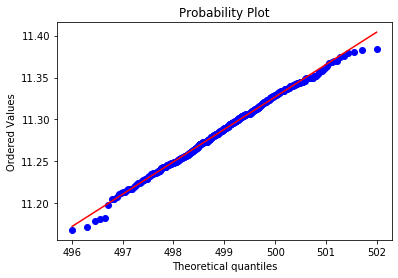

In [46]:
stats.probplot(n_clicks_control_bootstrap_means, dist="norm", sparams=(n_boot_samples-1), plot=plt)

((array([367.6442189 , 372.53648051, 375.20788183, ..., 645.83747148,
         649.69283594, 656.84189024]),
  array([  65866.30577125,   67455.34153175,   69638.19513523, ...,
         1395384.20128167, 1412260.44462185, 1508616.33674259])),
 (2297.501404201402, -940568.3967292218, 0.888632466392363))

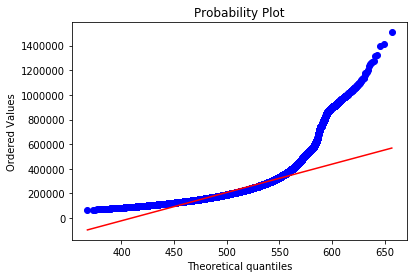

In [47]:
stats.probplot(control_boot_chi_squared, dist="chi2", sparams=(n_boot_samples-1), plot=plt) #R^2 - last number in tuple of size 3

Одним из возможных аналогов t-критерия, которым можно воспрользоваться, является тест Манна-Уитни. На достаточно обширном классе распределений он является асимптотически более эффективным, чем t-критерий, и при этом не требует параметрических предположений о характере распределения.

Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. Что можно сказать о получившемся значении достигаемого уровня значимости ? Выберите все правильные ответы

In [19]:
table = pd.pivot_table(data, values = ['n_clicks'], index = ['userID'], columns = ['slot'], aggfunc = np.sum)
table

n_clicks      
slot    control   exp
userID               
1           NaN  23.0
3           NaN   3.0
5           NaN  29.0
6          12.0   NaN
7           NaN  54.0
...         ...   ...
603133      1.0   NaN
603134      NaN   4.0
603135      0.0   NaN
603136      2.0   NaN
603137      NaN   3.0

[565842 rows x 2 columns]

In [20]:
n_clicks_control = table.n_clicks.control.values
n_clicks_exp = table.n_clicks.exp.values

In [21]:
def isNaN(x):
    return x != x

In [22]:
n_clicks_control = n_clicks_control[~isNaN(n_clicks_control)]
n_clicks_exp = n_clicks_exp[~isNaN(n_clicks_exp)]

In [23]:
stats.mannwhitneyu(n_clicks_control, n_clicks_exp)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [25]:
exp_data = data[data["slot"]=="exp"]
control_data = data[data["slot"]=="control"]

exp_user_clicks = exp_data.groupby("userID").agg("sum")["n_clicks"]
control_user_clicks = control_data.groupby("userID").agg("sum")["n_clicks"]

mann_whitney_stat = stats.mannwhitneyu(control_user_clicks, exp_user_clicks, alternative="two-sided")
print("Mann-Whitney criterion pvalue result: %.4f" % np.round(mann_whitney_stat.pvalue, 4))
mann_whitney_stat

Mann-Whitney criterion pvalue result: 0.0000


MannwhitneyuResult(statistic=38901259929.0, pvalue=8.694294377520879e-75)

In [50]:
exp_data.groupby("userID").agg("sum")

,n_clicks,n_queries,n_nonclk_queries
userID,,,
1,23,32,19
3,3,4,2
5,29,35,16
7,54,68,30
9,6,3,1
...,...,...,...
603129,0,1,1
603130,0,1,1
603131,4,4,1


Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

Для этого примените для каждого из срезов (по каждому из уникальных значений столбца browser) критерий Манна-Уитни между control и exp группами и сделайте поправку Холма-Бонферрони на множественную проверку с α=0.05.

Какое заключение можно сделать исходя из полученных результатов ?

В качестве ответа введите количество незначимых изменений с точки зрения результатов, полученных после введения коррекции.



In [29]:
vc = data.browser.value_counts()

In [30]:
control_4 = data[data.slot == 'control'][data.browser == 'Browser #4'].n_clicks.values
exp_4 = data[data.slot == 'exp'][data.browser == 'Browser #4'].n_clicks.values
control_22 = data[data.slot == 'control'][data.browser == 'Browser #22'].n_clicks.values
exp_22 = data[data.slot == 'exp'][data.browser == 'Browser #22'].n_clicks.values
control_2 = data[data.slot == 'control'][data.browser == 'Browser #4'].n_clicks.values
exp_2 = data[data.slot == 'exp'][data.browser == 'Browser #4'].n_clicks.values
control_14 = data[data.slot == 'control'][data.browser == 'Browser #14'].n_clicks.values
exp_14 = data[data.slot == 'exp'][data.browser == 'Browser #14'].n_clicks.values
control_20 = data[data.slot == 'control'][data.browser == 'Browser #20'].n_clicks.values
exp_20 = data[data.slot == 'exp'][data.browser == 'Browser #20'].n_clicks.values
control_17 = data[data.slot == 'control'][data.browser == 'Browser #17'].n_clicks.values
exp_17 = data[data.slot == 'exp'][data.browser == 'Browser #17'].n_clicks.values

/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """

In [31]:
from statsmodels.sandbox.stats.multicomp import multipletests 
p = []
for item in [(control_4, exp_4), (control_22, exp_22), (control_2, exp_2), (control_14, exp_14),
             (control_20, exp_20), (control_17, exp_17)]:
    stat, p_value = stats.mannwhitneyu(item[0], item[1])
    p.append(p_value)

reject, p_corrected, a1, a2 = multipletests(p, 
                                            alpha = 0.05, 
                                            method = 'holm')
df = pd.DataFrame({'p': p, 'p_corrected': p_corrected, 'reject': reject}, index = vc.index)
df

/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,p,p_corrected,reject
Browser #4,0.407606,1.000000,False
Browser #22,0.257406,1.000000,False
Browser #2,0.407606,1.000000,False
Browser #14,0.000000,0.000000,True
Browser #20,0.453667,1.000000,False
Browser #17,0.037401,0.187003,False


In [32]:
df[df.reject == False].reject.count()

5

In [33]:
control_4 = data[data.slot == 'control'][data.browser == 'Browser #4'][['n_queries', 'n_nonclk_queries']]
exp_4 = data[data.slot == 'exp'][data.browser == 'Browser #4'][['n_queries', 'n_nonclk_queries']]
control_22 = data[data.slot == 'control'][data.browser == 'Browser #22'][['n_queries', 'n_nonclk_queries']]
exp_22 = data[data.slot == 'exp'][data.browser == 'Browser #22'][['n_queries', 'n_nonclk_queries']]
control_2 = data[data.slot == 'control'][data.browser == 'Browser #4'][['n_queries', 'n_nonclk_queries']]
exp_2 = data[data.slot == 'exp'][data.browser == 'Browser #4'][['n_queries', 'n_nonclk_queries']]
control_14 = data[data.slot == 'control'][data.browser == 'Browser #14'][['n_queries', 'n_nonclk_queries']]
exp_14 = data[data.slot == 'exp'][data.browser == 'Browser #14'][['n_queries', 'n_nonclk_queries']]
control_20 = data[data.slot == 'control'][data.browser == 'Browser #20'][['n_queries', 'n_nonclk_queries']]
exp_20 = data[data.slot == 'exp'][data.browser == 'Browser #20'][['n_queries', 'n_nonclk_queries']]
control_17 = data[data.slot == 'control'][data.browser == 'Browser #17'][['n_queries', 'n_nonclk_queries']]
exp_17 = data[data.slot == 'exp'][data.browser == 'Browser #17'][['n_queries', 'n_nonclk_queries']]

/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """

In [36]:
control_4

,n_queries,n_nonclk_queries
3,6,0
5,4,1
7,15,2
13,1,0
15,59,34
...,...,...
566110,2,1
566111,4,2
566112,6,5
566131,1,1


In [39]:
temp = [0, 0]
nonclick_quaries_percent = []
for item in [(control_4, exp_4), (control_22, exp_22), (control_2, exp_2), (control_14, exp_14),
             (control_20, exp_20), (control_17, exp_17)]:
    temp[0] = item[0].n_nonclk_queries.sum()/item[0].n_queries.sum() * 100
    temp[1] = item[1].n_nonclk_queries.sum()/item[1].n_queries.sum() * 100
    nonclick_quaries_percent.append([temp[0], temp[1]])

In [40]:
nonclick_quaries_percent

[[46.97092963514274, 45.14294190358467],
 [40.593976593513354, 39.85394721969546],
 [46.97092963514274, 45.14294190358467],
 [57.59041136008114, 43.755617361273295],
 [40.540484743383296, 38.97737648371716],
 [36.29936674628208, 36.93741284866483]]